In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
hist = pd.read_csv('historical_data.csv')
fg = pd.read_csv('fear_greed_index.csv')

In [ ]:
fg.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
hist.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
hist.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [ ]:
fg.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [ ]:
print(hist.isnull().sum())
print(fg.isnull().sum())

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           1
Closed PnL          1
Transaction Hash    1
Order ID            1
Crossed             1
Fee                 1
Trade ID            1
Timestamp           1
dtype: int64
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [ ]:
hist['time'] = pd.to_datetime(hist['Timestamp IST'], errors='coerce')
fg['date'] = pd.to_datetime(fg['date'], errors='coerce')

In [ ]:
hist['date'] = hist['time'].dt.floor('D')

In [ ]:
fg['sentiment_score'] = fg['classification'].str.lower().map({'fear': 0,'extreme fear': 0,'greed': 1,'extreme greed': 1,'neutral': 0.5})

In [ ]:
daily_trades = hist.groupby('date').agg(
    trades_count=('Account', 'count'),
    total_volume=('Size USD', 'sum'),
    avg_leverage=('Start Position', 'mean'),
    net_pnl=('Closed PnL', 'sum')
).reset_index()

In [ ]:
daily = daily_trades.merge(fg[['date', 'sentiment_score']], on='date', how='left')

In [ ]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             143 non-null    datetime64[ns]
 1   trades_count     143 non-null    int64         
 2   total_volume     143 non-null    float64       
 3   avg_leverage     143 non-null    float64       
 4   net_pnl          143 non-null    float64       
 5   sentiment_score  113 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 6.8 KB


In [ ]:
daily.head()

,date,trades_count,total_volume,avg_leverage,net_pnl,sentiment_score
0,2024-01-03,137,472974.70,375587.745255,8244.241409,1.0
1,2024-01-04,77,339470.47,448724.641660,2507.963406,1.0
2,2024-01-05,14,87025.45,62.329514,0.000000,1.0
3,2024-01-07,13,97200.55,5.034208,1202.488212,1.0
4,2024-01-08,13,143995.01,84.548254,0.000000,1.0


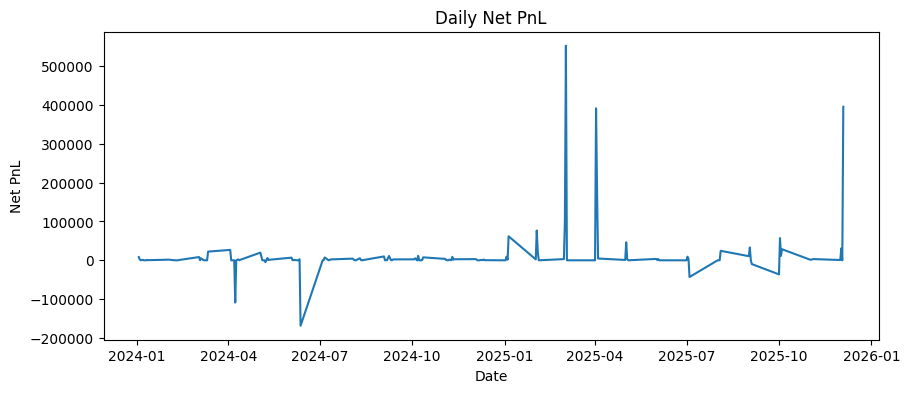

In [22]:
plt.figure(figsize=(10,4))
plt.plot(daily['date'], daily['net_pnl'])
plt.title('Daily Net PnL')
plt.xlabel('Date')
plt.ylabel('Net PnL')
plt.show()

Net Profit & Loss Over Time

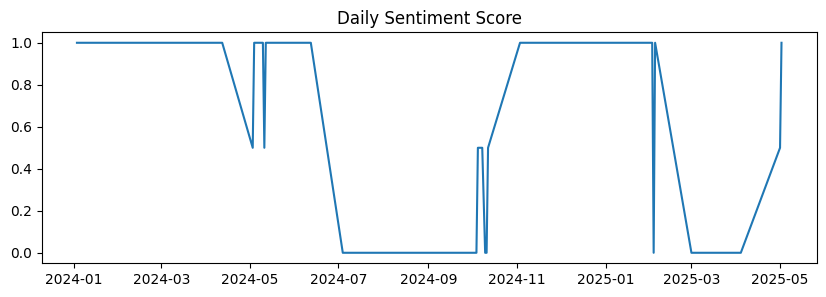

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(daily['date'], daily['sentiment_score'])
plt.title('Daily Sentiment Score')
plt.show()

Sentiment Over Time

In [ ]:
daily[['net_pnl','sentiment_score']].corr()

,net_pnl,sentiment_score
net_pnl,1.000000,-0.242141
sentiment_score,-0.242141,1.000000


In [ ]:
account_stats = hist.groupby('Account').agg(
    total_trades=('Account', 'count'),
    total_pnl=('Closed PnL', 'sum'),
    avg_size=('Size USD', 'mean')
).reset_index()
account_stats.sort_values('total_pnl', ascending=False).head(10)

,Account,total_trades,total_pnl,avg_size
0,0x083384f897ee0f19899168e3b1bec365f52a9012,3818,1.600230e+06,16159.576734
3,0x513b8629fe877bb581bf244e326a047b249c4ff1,12236,8.404226e+05,34396.580284
1,0x430f09841d65beb3f27765503d0f850b8bce7713,1237,4.165419e+05,2397.824753
4,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,1430,4.030115e+05,2133.667364
2,0x4f93fead39b70a1824f981a54d4e55b278e9f760,7584,3.089759e+05,17098.171055
5,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,3771,2.202649e+05,3431.095805
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,563,6.784562e+04,2979.441776
6,0x8381e6d82f1affd39a336e143e081ef7620a3b7f,1911,6.551366e+04,6279.002287


In [ ]:
daily.to_csv('daily_trades_with_sentimentscores.csv', index=False)

In [ ]:
hist['profitable_trade'] = (hist['Closed PnL'] > 0).astype(int)
account_stats = hist.groupby('Account').agg(
    total_pnl=('Closed PnL', 'sum'),
    win_rate=('profitable_trade', 'mean'),
    avg_leverage=('Start Position', 'mean'),
    total_trades=('Account', 'count')
).reset_index()
top_accounts = account_stats.sort_values(by='total_pnl', ascending=False)
print(top_accounts.head(10))

                                      Account     total_pnl  win_rate  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012  1.600230e+06  0.359612   
3  0x513b8629fe877bb581bf244e326a047b249c4ff1  8.404226e+05  0.401193   
1  0x430f09841d65beb3f27765503d0f850b8bce7713  4.165419e+05  0.484236   
4  0x72c6a4624e1dffa724e6d00d64ceae698af892a0  4.030115e+05  0.306294   
2  0x4f93fead39b70a1824f981a54d4e55b278e9f760  3.089759e+05  0.360364   
5  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4  2.202649e+05  0.815434   
7  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  6.784562e+04  0.408526   
6  0x8381e6d82f1affd39a336e143e081ef7620a3b7f  6.551366e+04  0.330194   

    avg_leverage  total_trades  
0   -1247.334684          3818  
3    3931.203457         12236  
1   33113.331632          1237  
4  -22347.346239          1430  
2       6.975656          7584  
5  104029.828513          3771  
7  178292.616626           563  
6   -7064.010066          1911  


Top performing accounts

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(daily['sentiment_score'], daily['net_pnl'], alpha=0.6)
plt.title("Sentiment Score vs Net PnL")
plt.xlabel("Sentiment Score (0 = Fear, 1 = Greed)")
plt.ylabel("Net PnL")
plt.axhline(0, color='red', linestyle='--')
plt.tight_layout()
plt.savefig('sentiment_vs_pnl_scatter.png', dpi=300)
plt.close()


fig, ax1 = plt.subplots(figsize=(10,5))
ax1.set_xlabel('Date')
ax1.set_ylabel('Net PnL', color='blue')
ax1.plot(daily['date'], daily['net_pnl'], color='blue', label='Net PnL')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Sentiment Score', color='orange')
ax2.plot(daily['date'], daily['sentiment_score'], color='orange', label='Sentiment Score')
ax2.tick_params(axis='y', labelcolor='orange')

fig.tight_layout()
plt.title("Net PnL and Sentiment Score Over Time")
plt.savefig('sentiment_pnl_over_time.png', dpi=300)
plt.close()

top_accounts = account_stats.sort_values(by='total_pnl', ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.bar(top_accounts['Account'], top_accounts['total_pnl'], color='green')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Accounts by Total PnL")
plt.xlabel("Account")
plt.ylabel("Total PnL")
plt.tight_layout()
plt.savefig('top_accounts_bar.png', dpi=300)
plt.close()

